In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


In [2]:
def read_potential_energy_file(input_file):
    try:
        data = np.transpose(np.genfromtxt(input_file, delimiter = ' ', skip_header = 1, dtype = float))
        return data[1], data[2], data[3]
    except:
        print('Please enter correct filepath')

In [3]:
def random_force(T,gamma,degree='K'):
    '''
    By putting the arguments Temperature,Damping Coefficient,Time Step we will get random Force
    '''
    if degree == 'C':
        T=T+273.15
    if degree == 'F':
        T=((T - 32)/1.8) + 273.15
    random_force_generated=np.random.normal(loc = 0, scale = (2*T*gamma*1)**0.5, size = 1) 
    #We calculate the variance of the random force
    return float(random_force_generated)
    
    

In [4]:
def drag_force(gamma,v):
    '''
    calculate the resistance force offered by the medium
    '''
    drag=-1*gamma*v
    
    return drag

In [5]:
def potential_force(x,pos,energy):
    '''
    calculate potential force at a point x 
    '''
    potential_force = np.interp(x, pos, energy)
    return potential_force

In [6]:
def euler(position, velocity,gamma,temperature,position_array,energy_array,time_step=1,degree='K',mass=1):
    '''
    calculate position,velocity and acceleration at a certain time_step
    '''
    force=drag_force(gamma,velocity) + random_force(temperature,gamma,degree='K') - potential_force(position,position_array,energy_array)
    acceleration=(force/mass)
    velocity+=acceleration*time_step
    position+=velocity*time_step
    return position,velocity,acceleration

In [7]:
position_array,force_array,energy_array=read_potential_energy_file('pote.txt')

In [ ]:
def add_figure_subplot(fig=plt.figure(),subplot_name,xlabel='X',ylabel='Y'):
    subplot=fig.add_subplot(subplot_name)
    subplot.set_xlabel(xlabel)
    subplot.set_ylabel(ylabel)
    return subplot
def update_plot(subplot,x_newdata,y_newdata,x_olddata=[],y_olddata=[],colour='b'):
    x.append(x_newdata)
    y.append(y_newdata)
    subplot.plot(x,y,color=colour)
    return x,y
    

In [ ]:
N = 1000
position = 1
velocity = 1
gamma=1
temperature=1
time1 = 0
count = 0
time_step=1
out_file='output.txt'
output = []
p=[]
v=[]
t=[]
%matplotlib notebook
plt.rcParams['animation.html'] ='jshtml'
fig=plt.figure()
fig1=plt.figure()
ax=fig.add_subplot(111)
ax1=fig1.add_subplot(222)
fig.show()
x,y=[],[]
n=[]
for i in range(N):
    new_pos,new_vel,new_acc = euler(position,velocity,gamma,temperature,position_array,energy_array,time_step)
    time1 += time_step
    count += 1
    output.append([count, time1, new_pos, new_vel])
    position = new_pos
    velocity = new_vel
    x.append(time1)
    y.append(position)
    n.append(velocity)   
    ax.plot(x,y,color='b')
    ax.set_xlabel('Time')
    ax.set_ylabel('Position')
    ax1.plot(x,n,color='r')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Velocity')
    fig.canvas.draw()
    fig1.canvas.draw()
    time.sleep(0.001)
write_output('tmkoc', output)
print('Final position = {:.4f}, Final velocity = {:.4f}'.format(position, velocity))

   
    
    

In [13]:
def write_output(out_file, output):
    f = open(out_file, 'w')
    f.write('index time position velocity\n')
    for line in output:
        for i in range(len(line)):
            if(i ==0):
                f.write('{} '.format(line[i]))
            else:
                f.write('{:.4f} '.format(line[i]))
        f.write('\n')
    f.close()



In [46]:
import time
import psutil

<IPython.core.display.Javascript object>


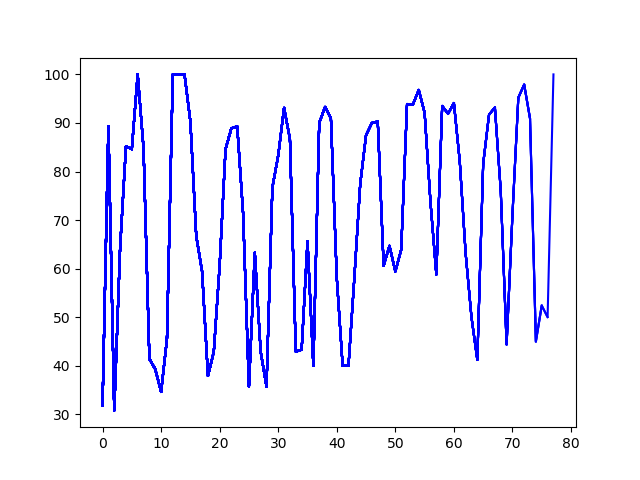

In [48]:
%matplotlib notebook
plt.rcParams['animation.html'] ='jshtml'
fig=plt.figure()
ax=fig.add_subplot(111)
fig.show()